In [5]:
# Import necessary module
import pandas as pd
import numpy as np
import camelot
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import os

C:\Users\P1357685\AppData\Local\Temp\ipykernel_29080\477960693.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pg.show()


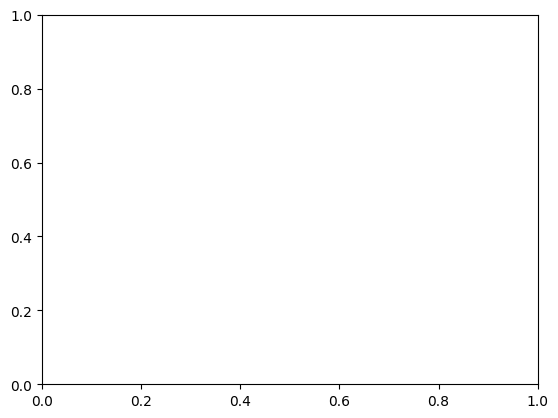

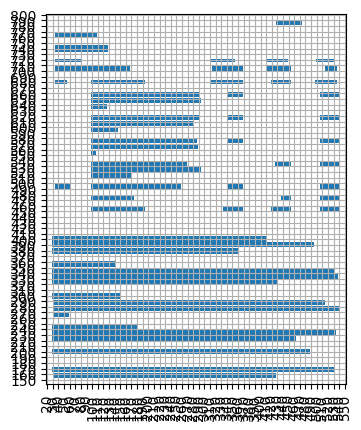

In [2]:
# Plot the table coordinates
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import camelot

table = camelot.read_pdf(r'C:\\Users\\P1357685\\Downloads\\eStatement_1002999063_2023_10.pdf', pages='2', flavor='stream',
                         split_text=True, strip_text='\n')

fig, ax = plt.subplots()
pg = camelot.plot(table[0], kind='text')
yaxis = plt.gca().yaxis
yaxis.set_major_locator(MultipleLocator(10))
xaxis = plt.gca().xaxis
xaxis.set_major_locator(MultipleLocator(10))
xaxis.set_tick_params(labelrotation=90)
plt.grid(True)
pg.show()

In [6]:
# Read PDF Statement into a table collection, the regions and columns separators is self-defined

month_str = '2023_10' # update this string to the latest batch
estatement_path = f'C:\\Users\\P1357685\\Downloads\\eStatement_1002999063_{month_str}.pdf'

tables = camelot.read_pdf(estatement_path, pages='all', flavor='stream', 
                         table_areas=['30,670,540,180'], columns=['90,310,400,480'], split_text=True, strip_text='\n')

In [60]:
# Merge all tables
df0 = (
    pd
    # combine all tables into one table
    .concat([tbl.df for tbl in tables._tables], ignore_index=True)
    .set_axis(['Date', 'Transaction Details', 'Withdrawal', 'Deposit', 'Balance'], axis=1)
)


In [61]:
# Clean the data 1 (Filter unwanted rows)

# Find the index where "BALANCE BF" is present in column 'Description'
start_index_1 = df0[df0['Transaction Details'].str.contains('Balance brought forward', case=False, na=False)].index[0]

# Find the index where "BALANCE CF" is present in column 'Description'
end_index_2 = df0[df0['Transaction Details'].str.contains('Balance carried forward', case=False, na=False)].index[0]

# Select rows between start_index and end_index (exclusive)
df1 = df0.loc[start_index_1:end_index_2]

In [ ]:
# Clean the data 2 (Rearrange index with transaction)

# creating a new column 'idx' where each group of consecutive rows with a non-empty 'Date' column gets a unique identifier.
df1['idx'] = (~df1['Balance'].str.contains('^$')).cumsum()
        
# Apply operations to each group
df2 = (
    df1
    .groupby('idx')
    .apply(lambda x: x.apply(lambda y: ' '.join(y.fillna('').astype(str))).str.strip())
    .reset_index(drop=True)
    .drop('idx', axis=1)
)

In [ ]:
# Clean the data 2 (Fill up 'Date' column and drop 'Balance BF' & 'Balance CF' rows)

# Fill up empty data in 'Date' column with previous date
df2['Date'] = df2['Date'].replace('', method='ffill')

# Find the index where "BALANCE BF" is present in column 'Description'
start_index_2 = df2[df2['Transaction Details'].str.contains('Balance brought forward', case=False, na=False)].index[0]

# Find the index where "BALANCE CF" is present in column 'Description'
end_index_2 = df2[df2['Transaction Details'].str.contains('Balance carried forward', case=False, na=False)].index[0]

# Select rows between start_index and end_index (exclusive)
df3 = df2.loc[start_index:end_index]

In [58]:
# save data frame into csv
output_filepath = f'C:\\Users\\P1357685\\Downloads\\output\\CIMB_{month_str}_transactions.csv'

if os.path.exists(output_filepath):
    print(f'CIMB {month_str} transaction csv is exist')
else:
    df2.to_csv(output_filepath)
    print(f'CIMB {month_str} transaction csv has been created')

CIMB 2023_10 transaction csv has been created
